# MINI BATCH GRADIENT DESCENT

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
d = [[0.2,3.4],
     [0.4,3.8],
     [0.6,4.2],
     [0.8,4.6]] 
d

[[0.2, 3.4], [0.4, 3.8], [0.6, 4.2], [0.8, 4.6]]

In [3]:
d_x = []
d_y = []
for i in range(len(d)):
    d_x.append(d[i][0])
    d_y.append(d[i][1])
d_x = np.array(d_x)
d_y = np.array(d_y)

INITIALISING BATCH SIZE AND CALCULATING NUMBER OF BATCHES

In [4]:
bs = 2
nb = (len(d)/bs)
nb

2.0

In [5]:
samples = np.arange(len(d))
random.shuffle(samples)
samples

array([2, 0, 3, 1])

In [6]:
for i in samples:
    print(d_x[i],d_y[i])

0.6 4.2
0.2 3.4
0.8 4.6
0.4 3.8


INITIALISING ALL REQUIRED PARAMETERS

In [7]:
m = 1
c = -1
iter = 1
epochs = 10000
batch = nb - 1
bat = 1
alpha = 0.1

In [8]:
while (iter<=epochs):
    i = 0
  # RUNNING ITERATION FOR N-1 BATCHES
    while (bat <= batch):
        der_m = 0
        der_c = 0
        err = 0
        for k in range(0,bs):
            der_m = der_m + (d_y[samples[i]] - (m*d_x[samples[i]])-c)*(d_x[samples[i]])
            der_c = der_c + (d_y[samples[i]] - (m*d_x[samples[i]])-c)
            i = i+1
    # err = der_c**2
    # err = (1/(2*bs))*err
    # error.append(err)
        der_m = (1/bs)*der_m
        der_c = (1/bs)*der_c
        change_m = (-1)*alpha*der_m
        change_c = (-1)*alpha*der_c
        m = m + change_m
        c = c + change_c
        bat = bat + 1
    
    # EXECUTING FOR LAST BATCH
    der_m = 0
    der_c = 0
    err = 0
  # FINDING REMAINING NUMBER OF BATCHES
    es = len(samples) - i  
  
    for k in range(i,len(samples)):
        der_m = der_m + (d_y[samples[i]] - (m*d_x[samples[i]])-c)*(d_x[samples[i]])
        der_c = der_c + (d_y[samples[i]] - (m*d_x[samples[i]])-c)
        i = i + 1
    der_m = (-1/es)*der_m
    der_c = (-1/es)*der_c
  
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c
  
    m = m + change_m
    c = c + change_c
  
    iter = iter + 1

print(m,c)

2.000000000000064 2.999999999999966


PREDICTING THE OUTPUT FOR TRAINING DATA

In [9]:
pred = []
for i in range(0,len(d)):
    pred.append(m*d_x[i] + c)
pred

[3.3999999999999786, 3.7999999999999914, 4.200000000000005, 4.600000000000017]

In [10]:
m*0.4 + c

3.7999999999999914

In [11]:
# MEAN SQUARE ERROR IN EXPONENTIAL FORM
# MINIMISED ERROR
mse = 0
for i in range(0,len(d)):
    mse += (d_y[i] - (m*d_x[i]) -c)**2
mse = (1/len(d))*mse
mse

2.103793426611286e-28

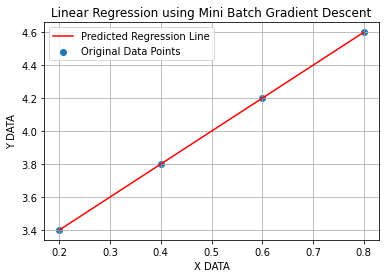

In [13]:
# PLOTTING OF DATA
plt.scatter(d_x,d_y,label='Original Data Points')
plt.plot(d_x,pred,'red',label='Predicted Regression Line')
plt.legend()
plt.title("Linear Regression using Mini Batch Gradient Descent")
plt.xlabel("X DATA")
plt.ylabel("Y DATA")
plt.grid()